In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
PATH = "./data/dogscats/"
sz=224

In [3]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [4]:
learn.load('dogscats_resnet50')

In [5]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)

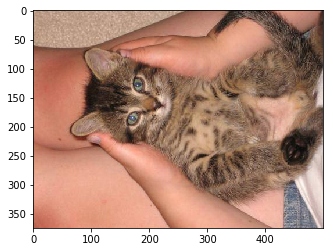

In [6]:
fn = f'{PATH}test1/6.jpg'
img = plt.imread(fn)
plt.imshow(img);

In [7]:
im = val_tfms(open_image(fn))

In [8]:
learn.precompute=False
preds = learn.predict_array(im[None])

In [9]:
data.classes[np.argmax(preds)]

'cats'